In [1]:
from dna_segmentation_benchmark import evaluate_predictors as ep
from enum import Enum

## Config
You have to create your own enum class that maps the integers to your labels. This works with every label you can think of as long as it has an integer mapping.
**YOU MUST DEFINE NONCODING**. \
Furthermore, it is advised for now to also define **EXON** as some evaluation metrics depend on it. \
To select the kind of evaluations you want simply add the corresponding class

In [2]:
class CustomLabelDef(Enum):
    NONCODING = 1
    EXON = 2
    INTRON = 3


chosen_eval_metrics = [ep.EvalMetrics.INDEL, ep.EvalMetrics.SECTION, ep.EvalMetrics.ML, ep.EvalMetrics.FRAMESHIFT]
classes_to_eval = [CustomLabelDef.EXON, CustomLabelDef.INTRON]

In [4]:
evaluation = ep.benchmark_gt_vs_pred_multiple(gt_labels=example_gt_labels,
                                              pred_labels=example_pred_labels,
                                              labels=CustomLabelDef,
                                              classes=classes_to_eval,
                                              metrics=chosen_eval_metrics)

/home/benjaminkroeger/Documents/Master/MasterThesis/Thesis_Code/Benchmark/src/dna_segmentation_benchmark/evaluate_predictors.py:142: UserWarning: The Frameshift metric should only be used if you are sure that the transcript contains all  of the annotated exons. Otherwise this metric will produce wrong and misleading results
  warnings.warn("The Frameshift metric should only be used if you are sure that the transcript contains all "
Running benchmark: 100%|██████████| 9/9 [00:00<00:00, 1205.41it/s]



--- Generating plots for class: EXON ---


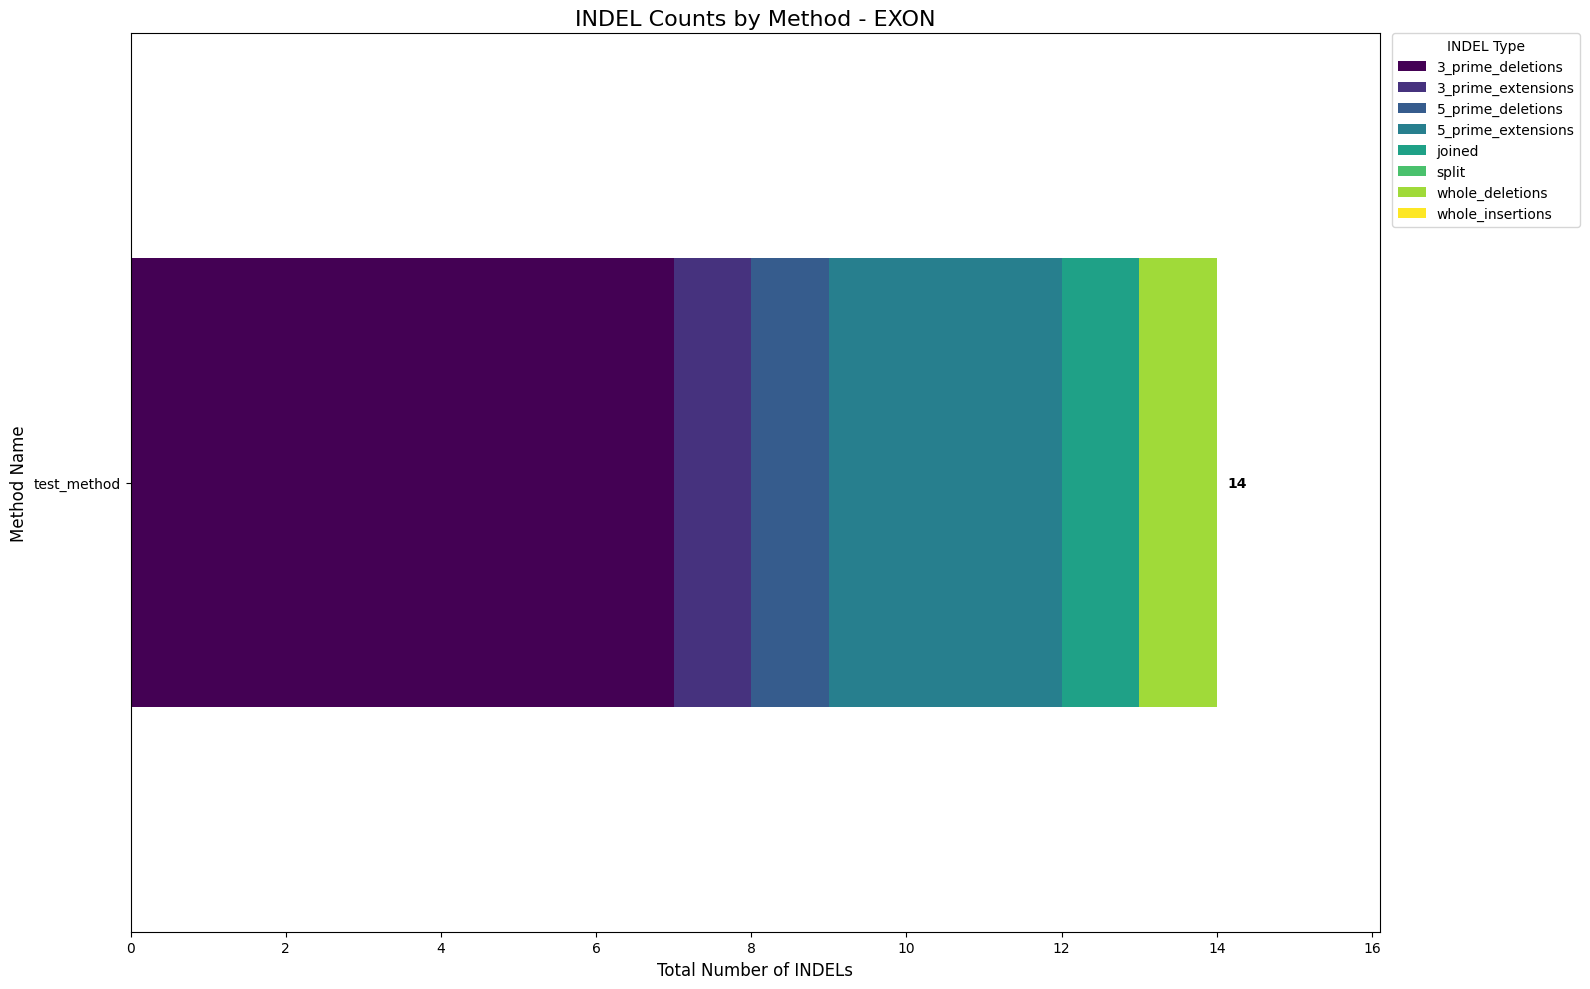

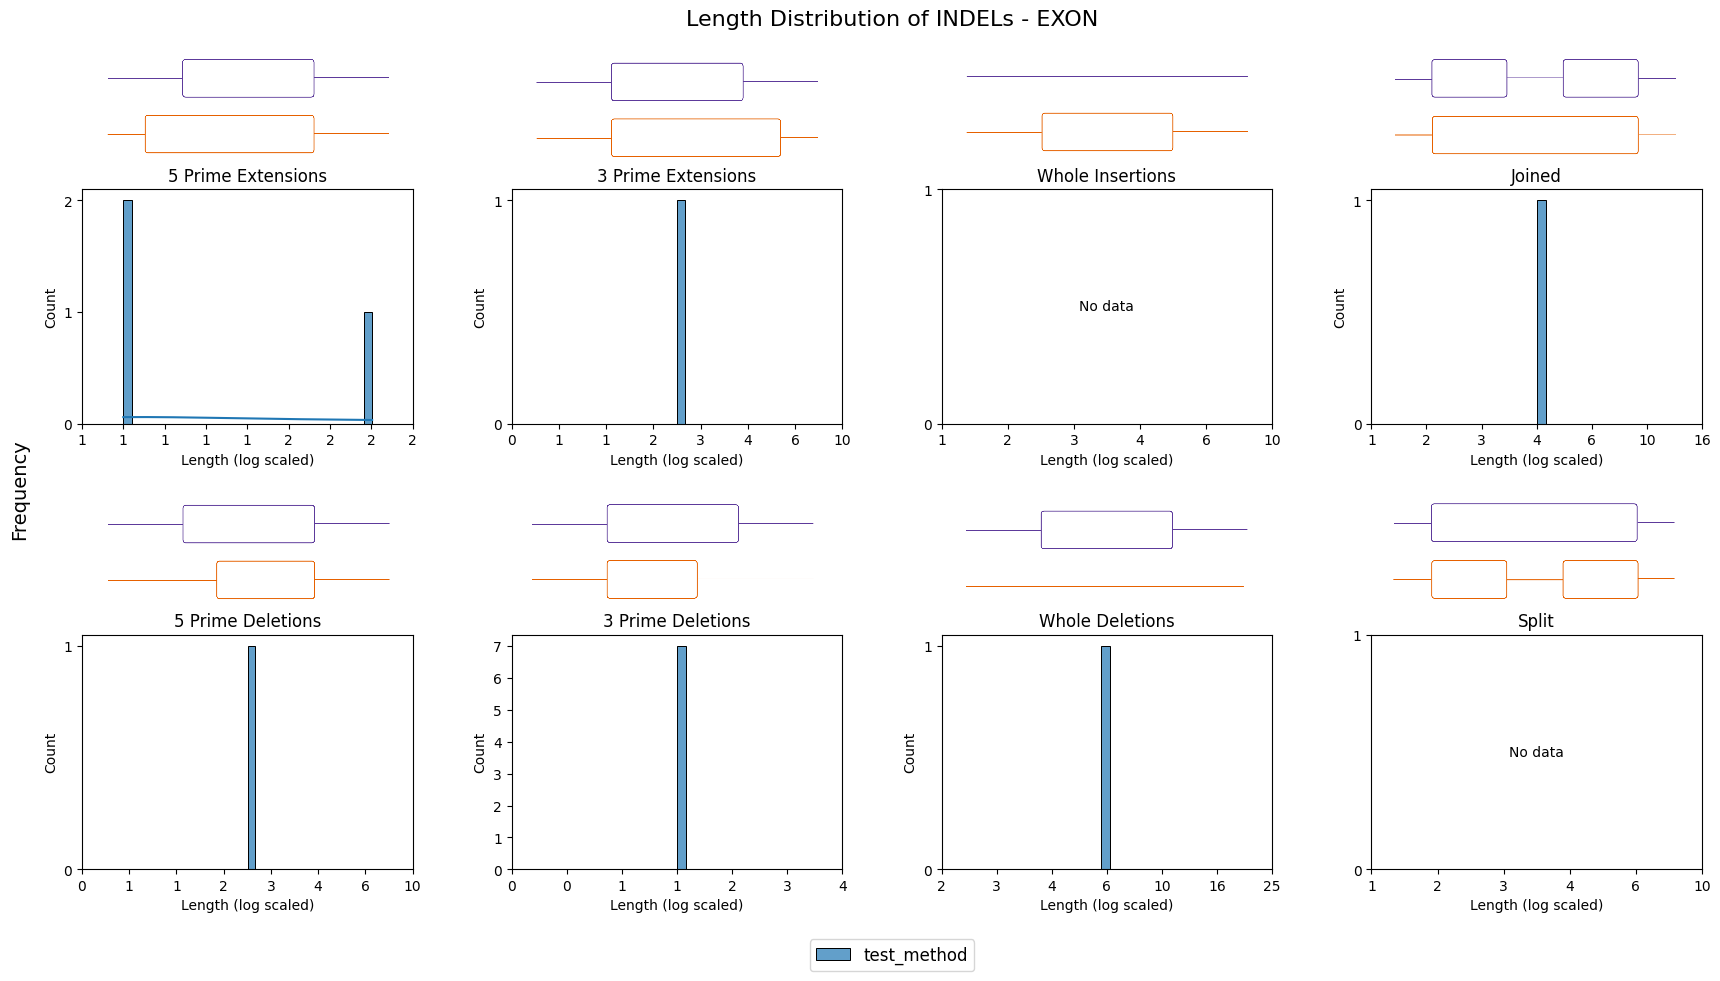

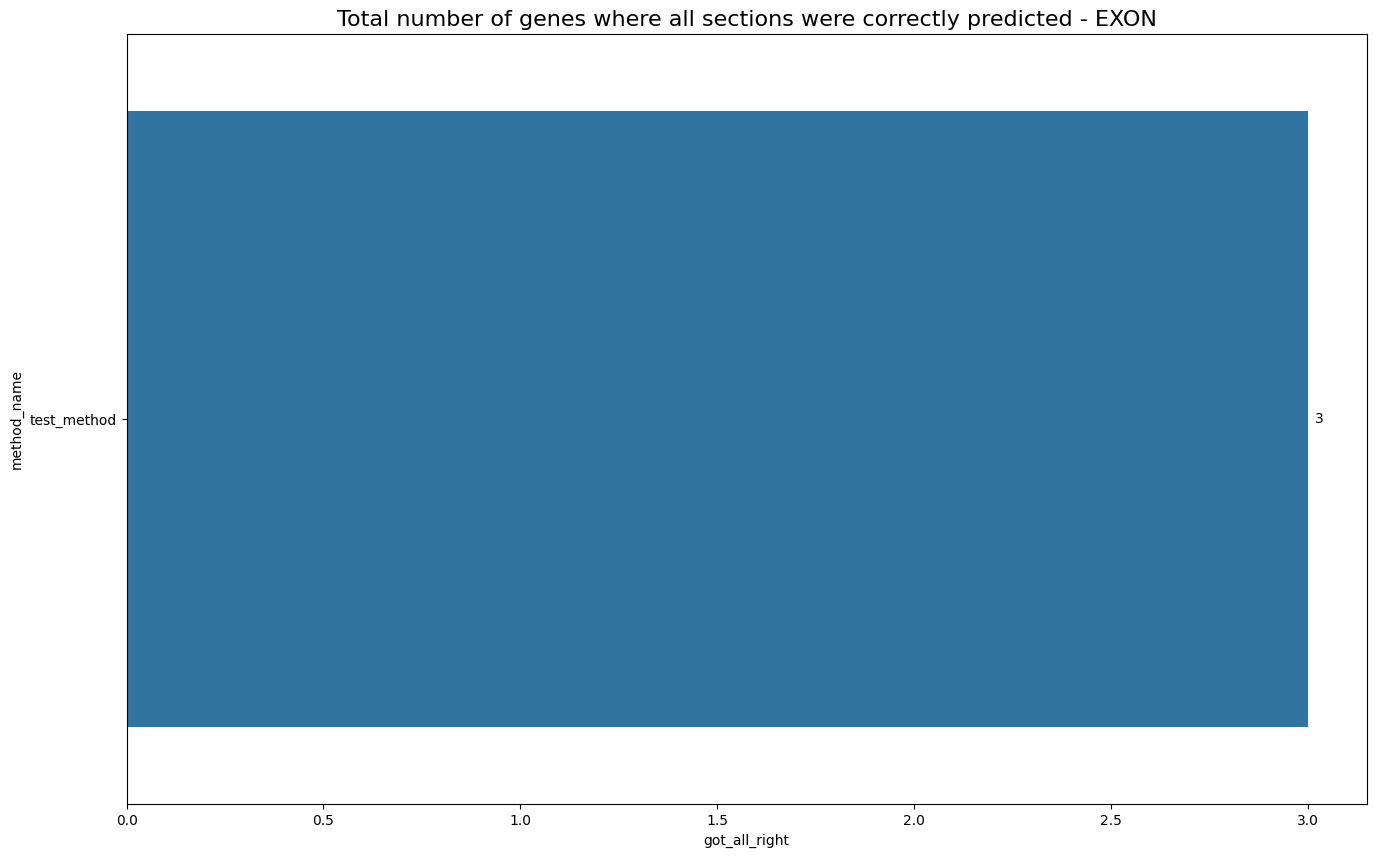

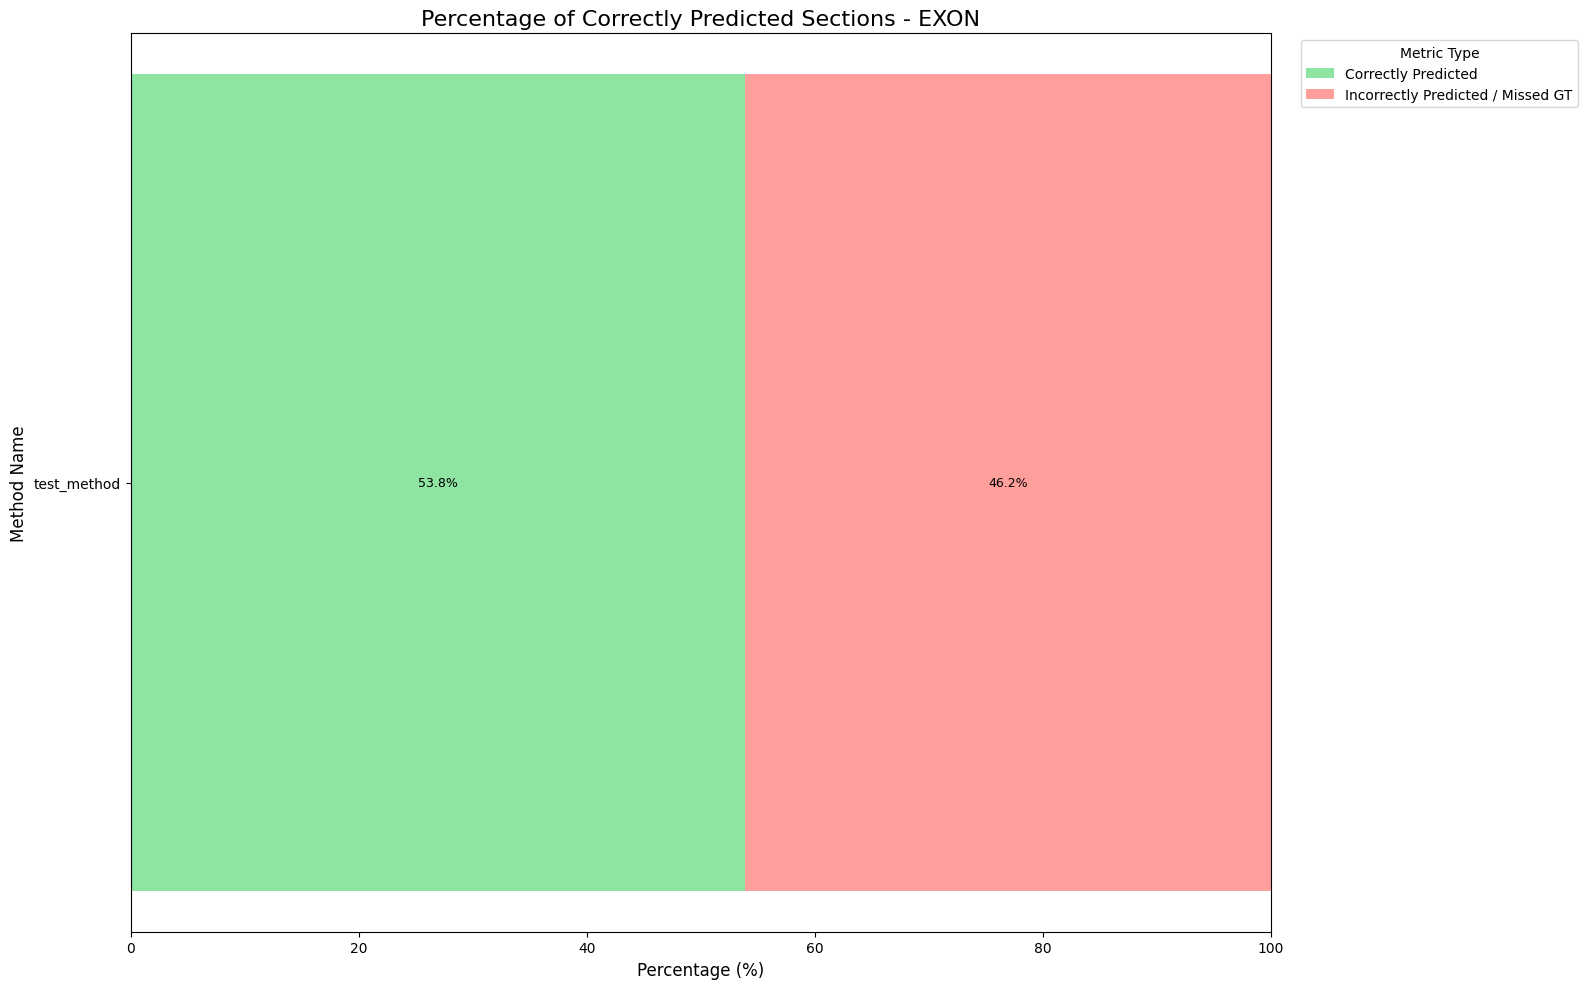

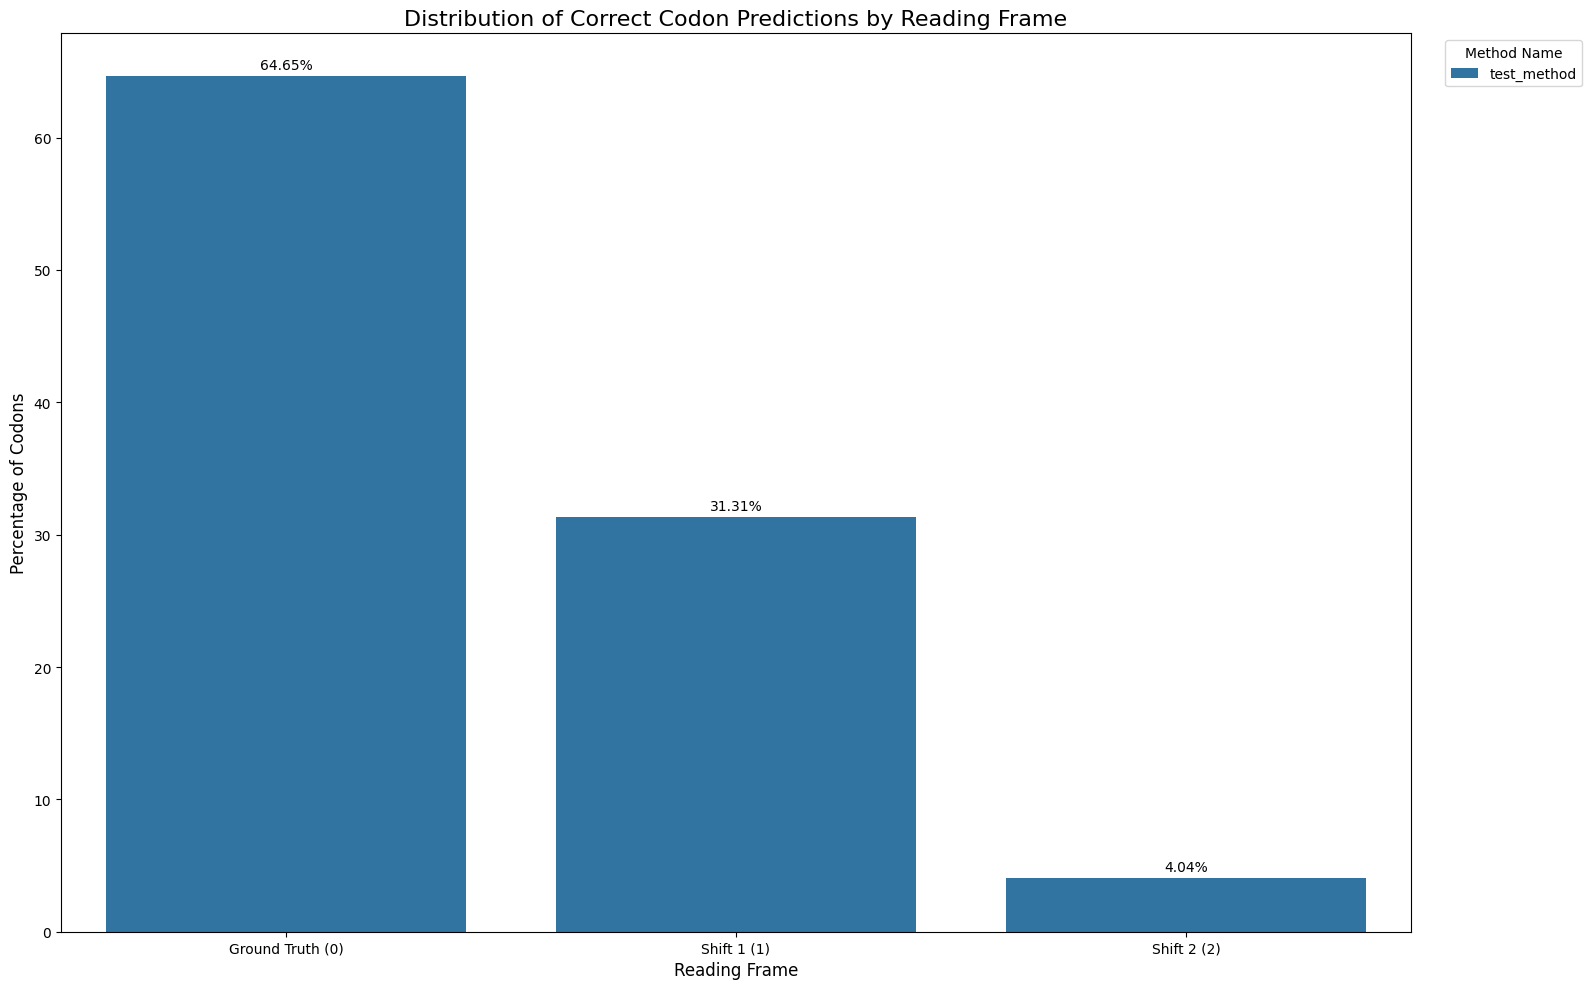


--- Generating plots for class: INTRON ---


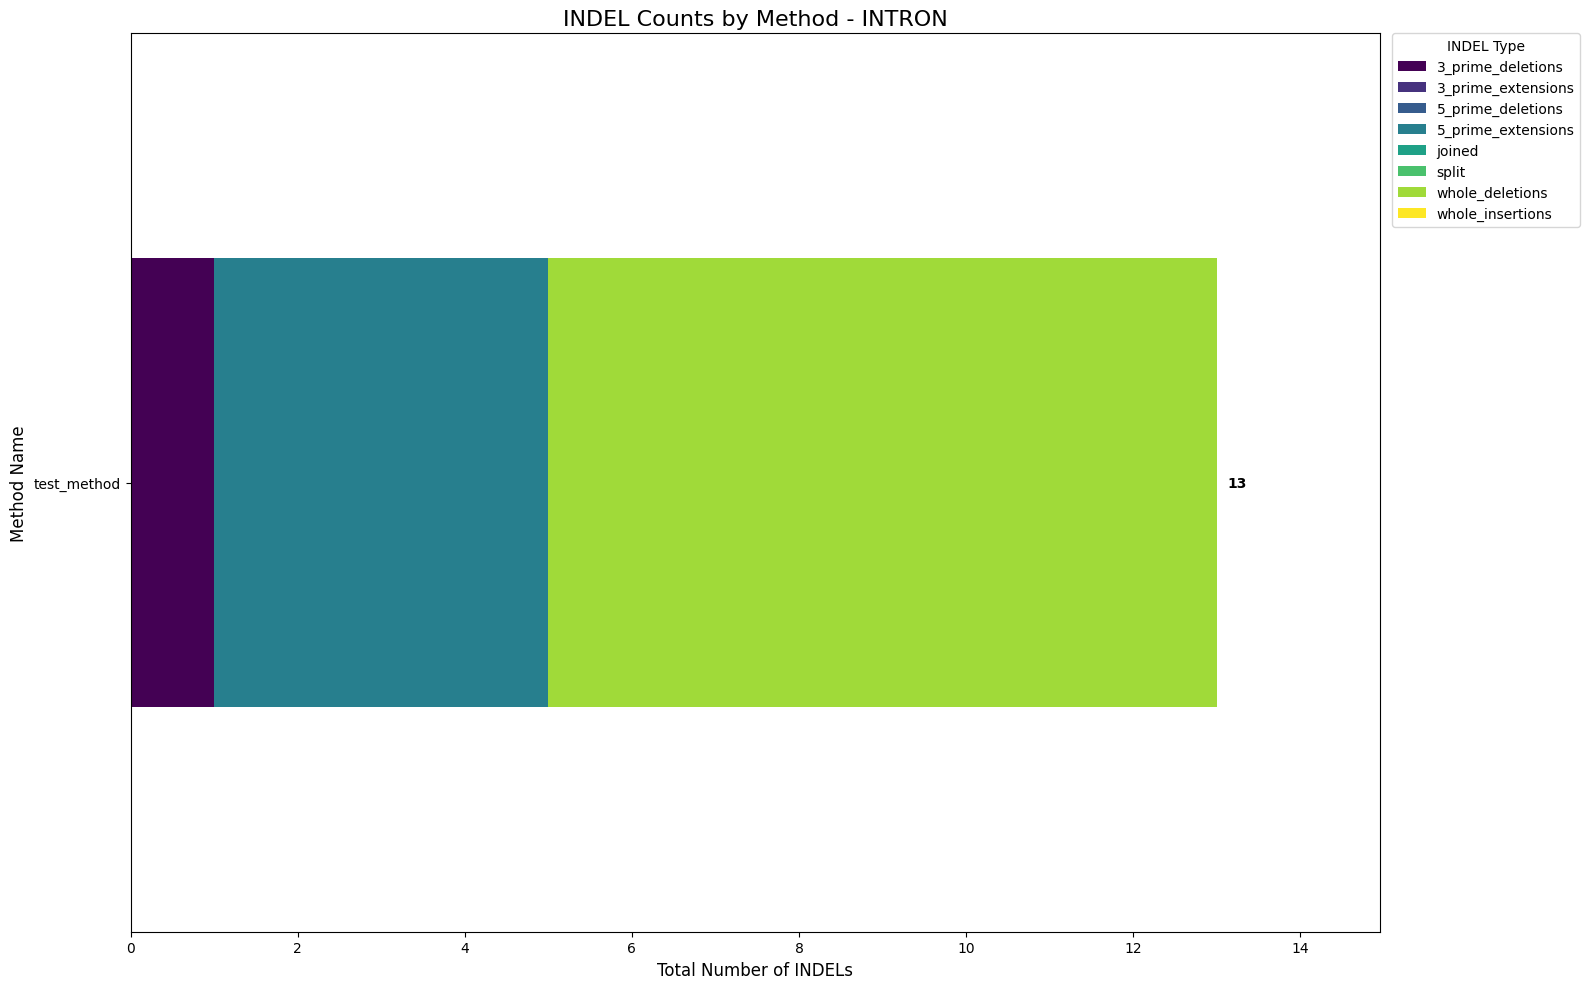

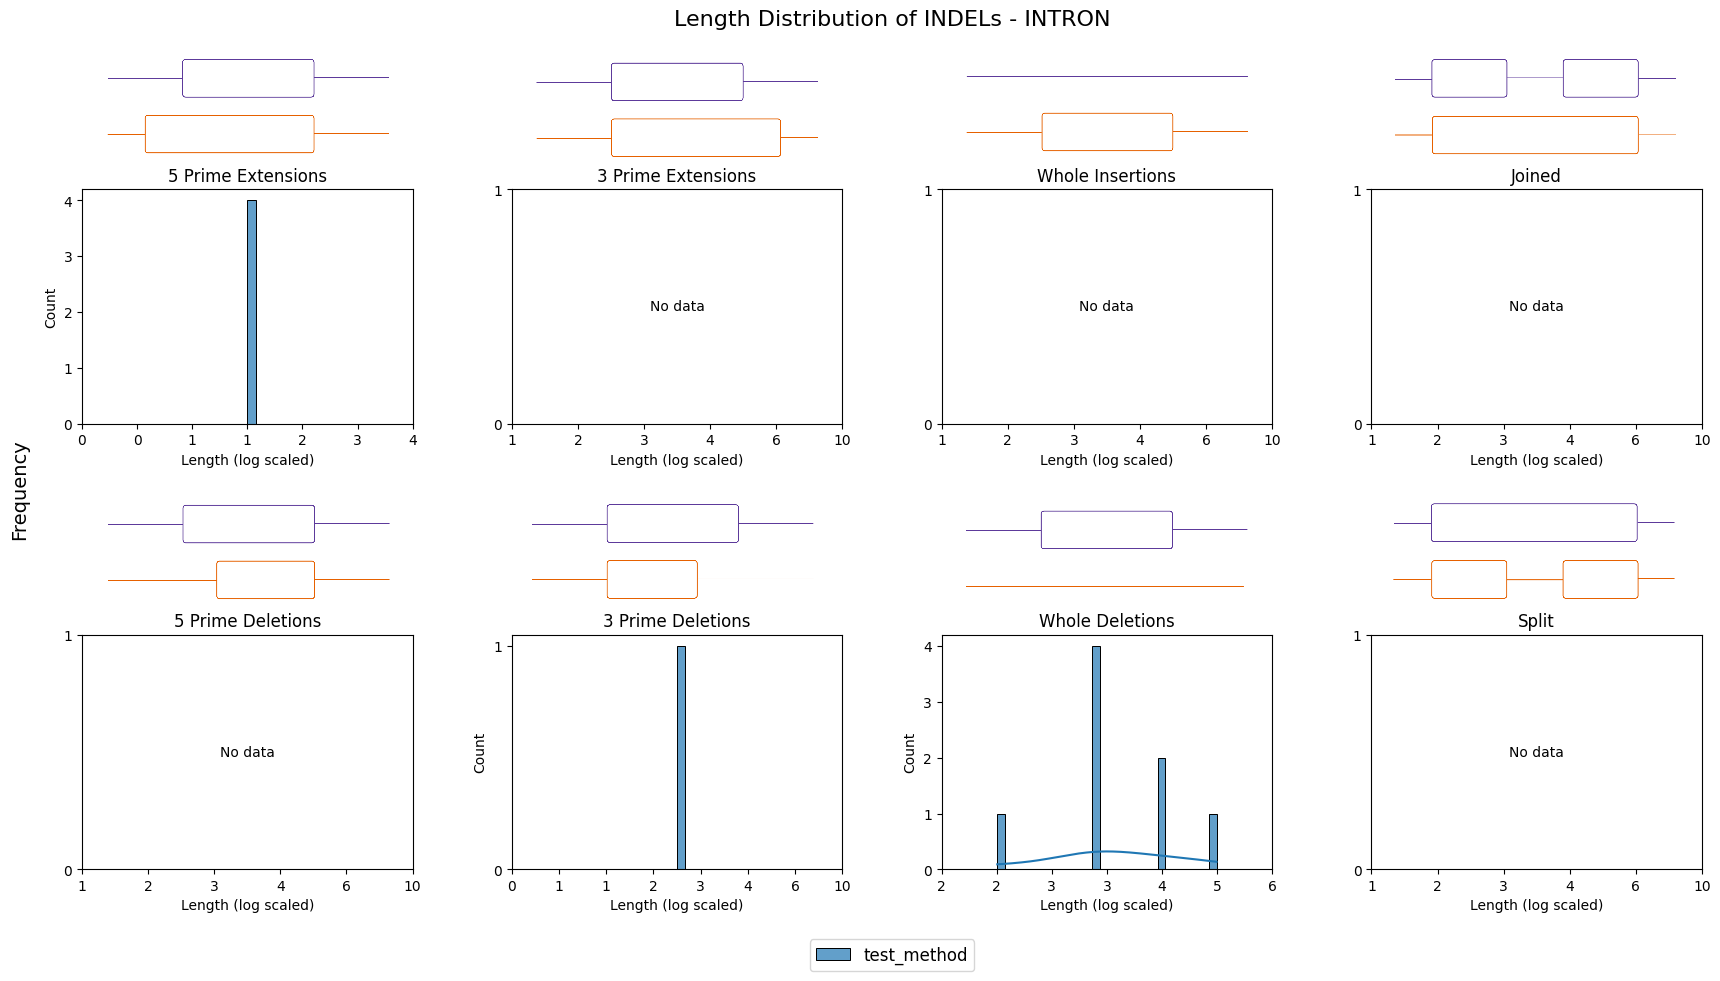

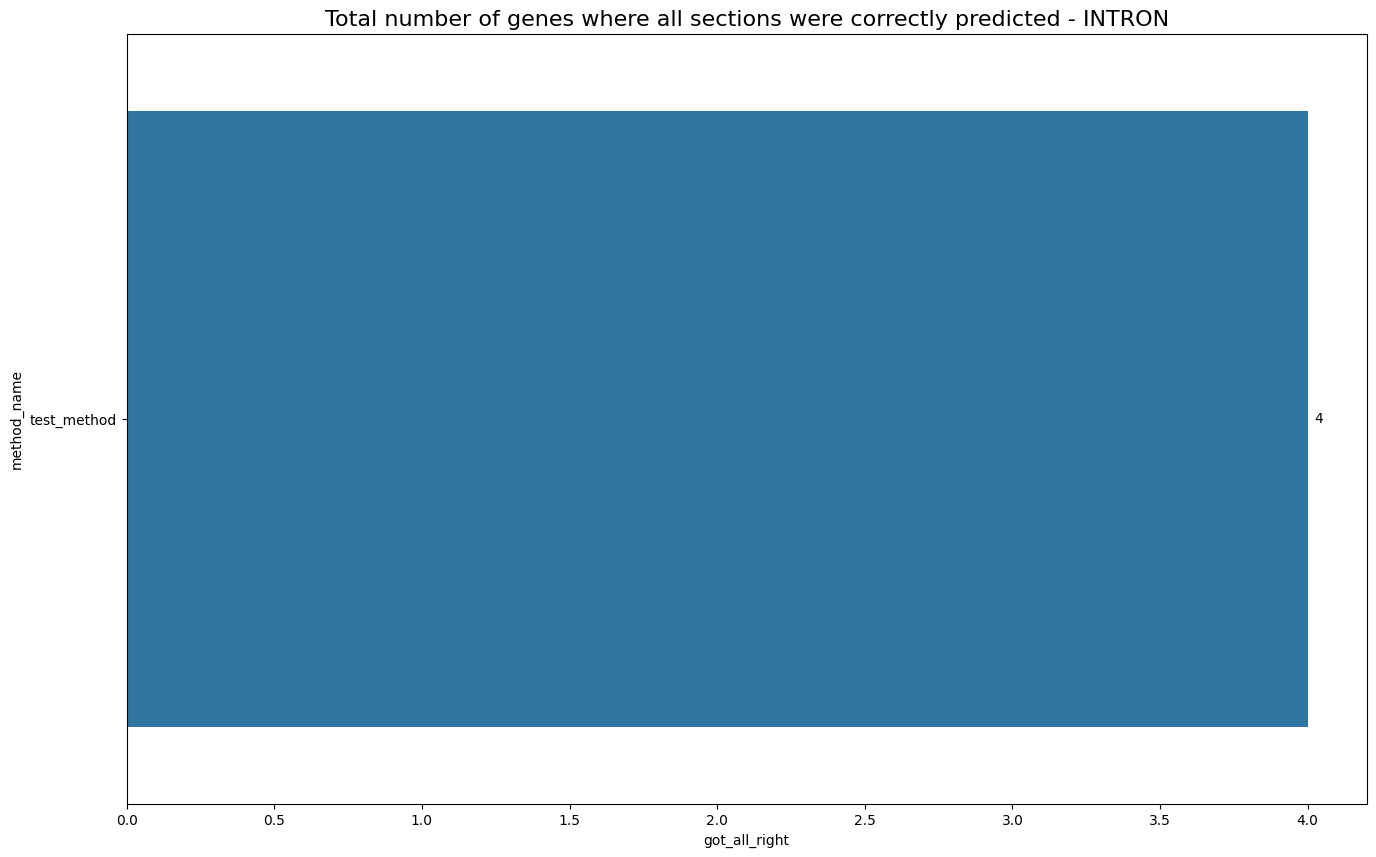

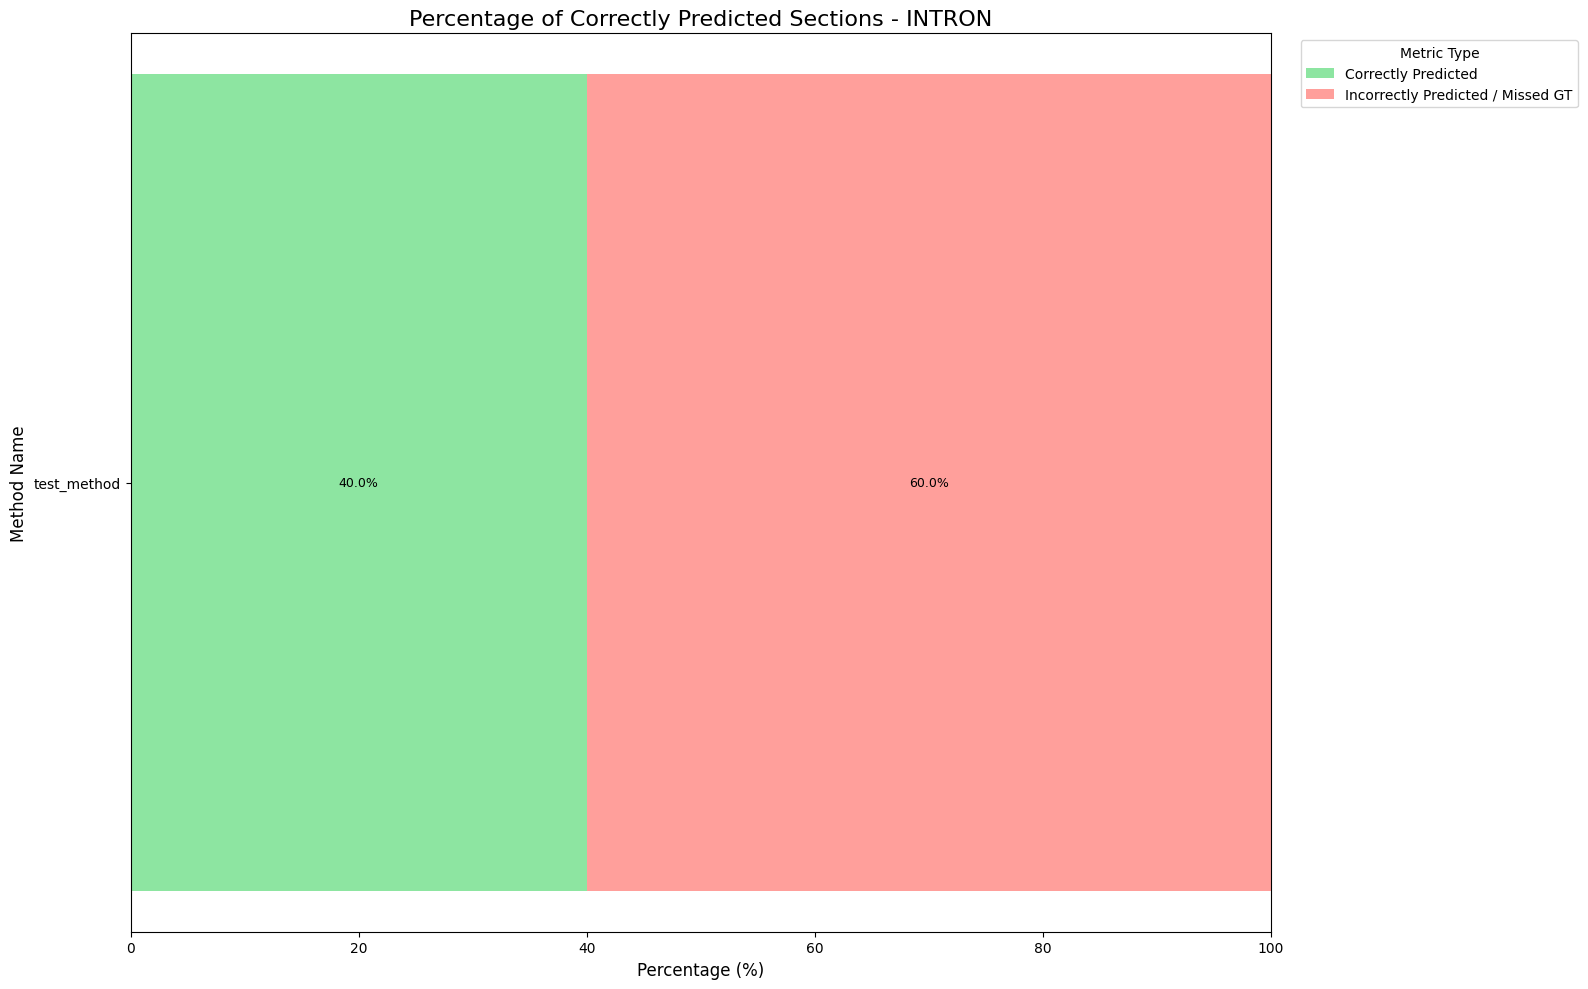

No FRAMESHIFT data for class INTRON.


In [6]:
from dna_segmentation_benchmark.summary_stat_plotting import compare_multiple_predictions
dummy_commparisson_dict = {"test_method":evaluation}
compare_multiple_predictions(per_method_benchmark_res=dummy_commparisson_dict,
                             classes_to_eval=classes_to_eval,
                             metrics_to_eval=chosen_eval_metrics)